# **Maestría en Inteligencia Artificial Aplicada**

## **Curso: Inteligencia Artificial y Aprendizaje Automático**

**Tecnológico de Monterrey**

Prof Luis Eduardo Falcón Morales

Actividad de Semana 3 - Septiembre 2024

**Rotación de Personal - IBM**

#### **Nombre y matrícula: Angel Irwin Briseño Fierro - A01796844**

#### **La siguiente actividad se basa en los datos del archivo "WA_Fn-UseC_-HR-Employee-Attrition.csv" que se encuentra en la siguiente liga de Kaggle, llamada "IBM HR Analytics Employee Attrition & Performance":**

https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset


In [49]:
# Incluye aquí todas las librerías que consideres necesarias:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Ejercicio 1:**

#### **Incluye una breve introducción sobre lo que se entiende por el problema de rotación de personal en las organizaciones (employee attrition problem).**

++++++++ Inicia la sección de agregar texto: ++++++++++++


None


++++++++ Termina la sección de agregar texto. +++++++++++

# **Ejercicio 2:**

#### **Carga los datos del archivo de la página de Kaggle indicada como un DataFrame de Pandas, llamado "df" y utilicemos el método “describe” con el argumento include= “all”, para obtener una primera descripción general de cada variable.**

In [41]:
# ++++++++++++++ Inicia sección de agregar código ++++++++++++++++++++
file_path="/content/drive/MyDrive/IAAyAA/Semana3/WA_Fn-UseC_-HR-Employee-Attrition.csv"

df = pd.read_csv(file_path)

# +++++++++++++ Termina sección de agregar código +++++++++++++++++++++


print("Tamaño del DataFrame:", df.shape)
df.describe(include = 'all').T


Tamaño del DataFrame: (1470, 35)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1470.0,NaN,NaN,NaN,36.92381,9.135373,18.0,30.0,36.0,43.0,60.0
Attrition,1470,2,No,1233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BusinessTravel,1470,3,Travel_Rarely,1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,1470.0,NaN,NaN,NaN,802.485714,403.5091,102.0,465.0,802.0,1157.0,1499.0
Department,1470,3,Research & Development,961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,1470.0,NaN,NaN,NaN,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,NaN,NaN,NaN,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EducationField,1470,6,Life Sciences,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeCount,1470.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,1470.0,NaN,NaN,NaN,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0


# **Ejercicio 3:**

#### **Indica cuál es la diferencia entre utilizar o no el argumento include=”all” del método "describe" en el ejercicio anterior.**

++++++++ Inicia la sección de agregar texto: ++++++++++++


None


++++++++ Termina la sección de agregar texto. +++++++++++

# **Ejercicio 4:**

#### **Con base a la información desplegada por la instrucción anterior, hemos decidido cancelar los siguientes factores de nuestro problema: Over18, EmployeeCount, StandardHours, EmployeeNumber. Explica cuál es la justificación que nos permite cancelar cada uno de estos factores:**

++++++++ Inicia la sección de agregar texto: ++++++++++++

**a)   Over18**: Todos los encuestados son mayores de 18 años.

**b)	EmployeeCount**: El valor de conteo es 1 en todos los casos.

**c)	StandardHours**: El valor es el mismo en todos los casos 80hrs.

**d)	EmployeeNumber**: Es solo un numbero único o de identificación, por lo que no ofrece nada para la solución.

++++++++ Termina la sección de agregar texto. +++++++++++




In [42]:
# Eliminamos los factores indicados:

df = df.drop(['Over18','EmployeeCount','StandardHours','EmployeeNumber'],axis=1)

print("Tamaño del nuevo DataFrame:", df.shape)

Tamaño del nuevo DataFrame: (1470, 31)


# **Ejercicio 5:**

#### **Realiza una partición de los datos en Entrenamiento, Validación y Prueba, del 70%, 15% y 15%, respectivamente. Llama a dichos conjuntos Xtrain, Xval, Xtest, ytrain, yval, ytest, para los datos de entrada y de salida, respectivamente. Asegúrate que dicha partición conserve la estratificación de las clases de la variable “Attrition”. Despliega además la dimensión obtenida de los tres conjuntos: Entrenamiento, Validación y Prueba.**

#### **NOTA: Utiliza semillas en cada función de partición, para permitir la repetibilidad de tu modelo y poder evaluarlo de mejor majera.**

In [43]:
# ++++++++++++++ Inicia sección de agregar código +++++++++++++++++++++
X = df.drop(['Attrition'],axis=1)
y = df[['Attrition']]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=1)
Xtest, Xval, ytest, yval = train_test_split(Xtest, ytest, test_size=0.5, random_state=1)

print('Dimension del conjunto Entrenamiento: ',Xtrain.shape)
print('Dimension del conjunto Validación: ',Xval.shape)
print('Dimension del conjunto Prueba: ',Xtest.shape)
# ++++++++++++++ Termina sección de agregar código +++++++++++++++++++++

Dimension del conjunto Entrenamiento:  (1029, 30)
Dimension del conjunto Validación:  (221, 30)
Dimension del conjunto Prueba:  (220, 30)


# **Ejercicio 6:**


#### **Aplica la transformación LabelEncoder() de sklearn a la variable de salida “Attrition”. Las nuevas variables deberán llamarse ahora: ytrainT, yvalT, ytestT. Encuentra la proporción de datos en cada nivel de esta variable y con base a dicha información indica si podemos considerar que tenemos un problema de datos desbalanceados.**

#### NOTA: Aplica esta transformación evitando el filtrado de información (data leakage).

In [44]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++


le = LabelEncoder()
ytrainT = pd.DataFrame(le.fit_transform(ytrain), columns=ytrain.columns)
yvalT = pd.DataFrame(le.fit_transform(yval), columns=yval.columns)
ytestT = pd.DataFrame(le.fit_transform(ytest), columns=yval.columns)


# +++++++++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++


print('Porcentaje de datos en cada clase de entrenamiento - Attrition:', ytrainT['Attrition'].value_counts() / ytrainT.shape[0])

Porcentaje de datos en cada clase de entrenamiento - Attrition: Attrition
0    0.844509
1    0.155491
Name: count, dtype: float64


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# **Ejercicio 7:**


#### **Incluye a continuación el análisis gáfico y describtivo que consideres adecuado. Con base a estos gráficos ¿qué tipo de transformaciones sugieres llevar a cabo en dichas variables?**

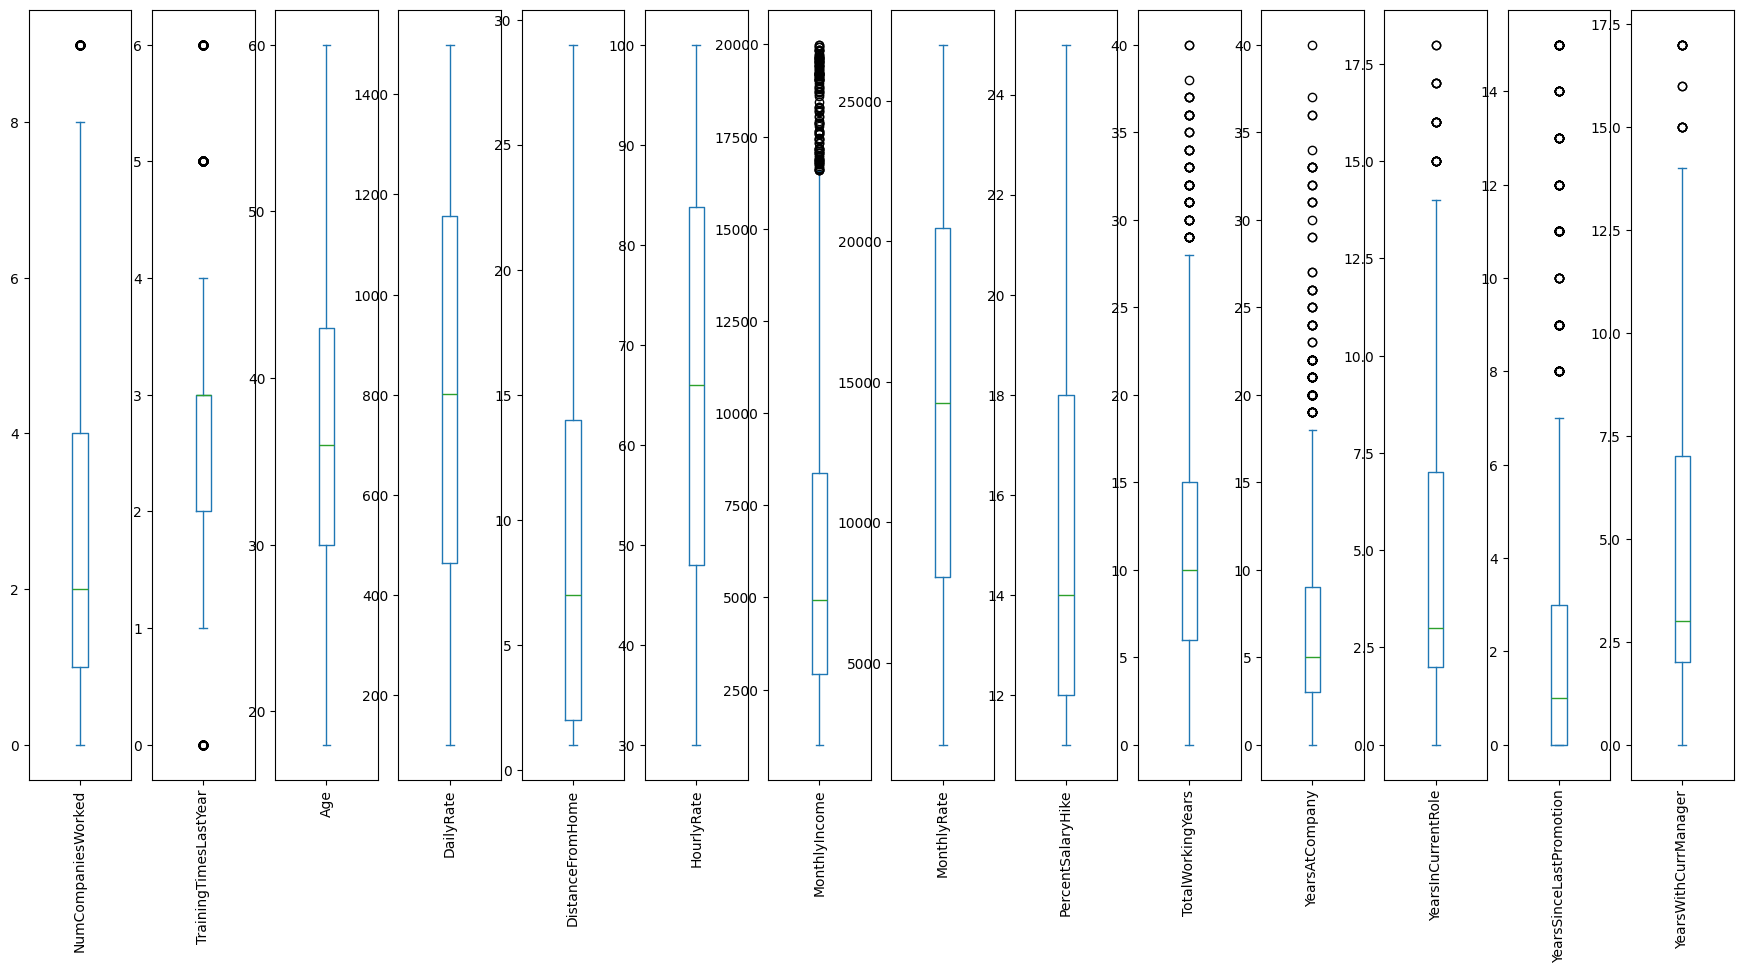

In [51]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++
# Incluye en esta sección todas las celdas que consideres conveniente.

numVar = ['NumCompaniesWorked',
          'TrainingTimesLastYear',
          'Age',
          'DailyRate',
          'DistanceFromHome',
          'HourlyRate',
          'MonthlyIncome',
          'MonthlyRate',
          'PercentSalaryHike',
          'TotalWorkingYears',
          'YearsAtCompany',
          'YearsInCurrentRole',
          'YearsSinceLastPromotion',
          'YearsWithCurrManager']
ordVar=['Education',
        'EnvironmentSatisfaction',
        'JobInvolvement',
        'JobLevel',
        'JobSatisfaction',
        'PerformanceRating',
        'RelationshipSatisfaction',
        'StockOptionLevel',
        'WorkLifeBalance']
binVar=['Gender',
        'OverTime']
nomVar=['BusinessTravel',
        'Department',
        'EducationField',
        'JobRole',
        'MaritalStatus']

df[numVar].plot(kind='box', subplots=True,figsize=(22,10),rot=90)
plt.show()


# ++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++



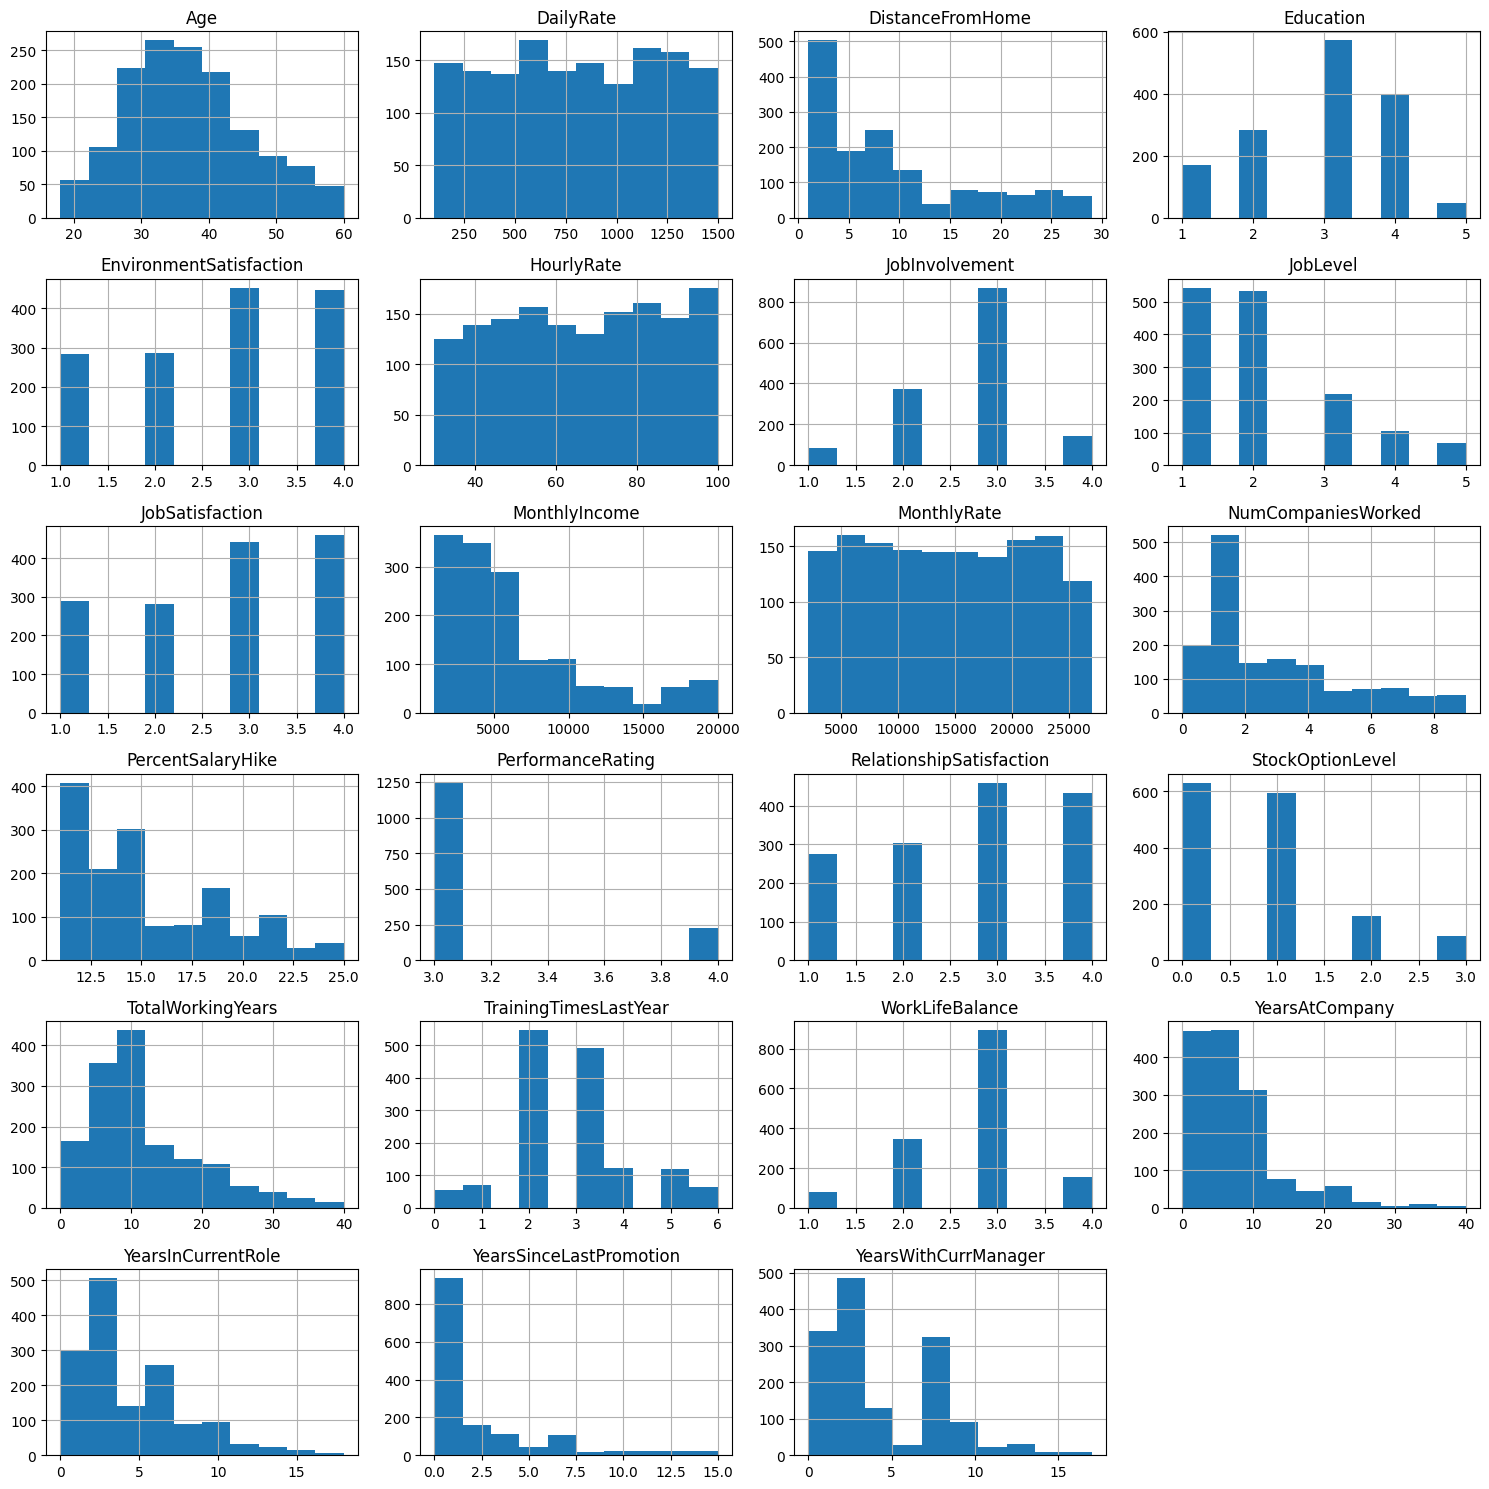

In [46]:
df.hist(figsize=(15,15), layout=(6,4))
plt.tight_layout()
plt.show()

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
OverTime,1470,2,No,1054


<Axes: >

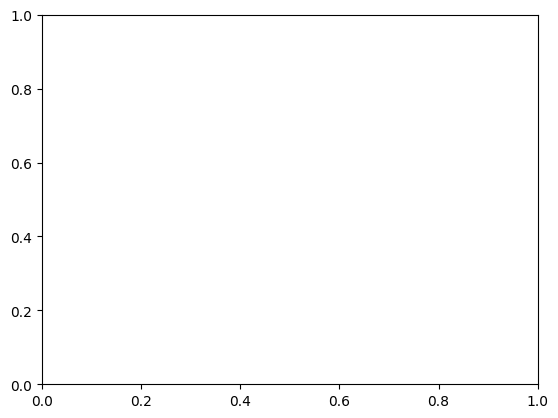

In [50]:
display(df.describe(exclude=np.number).T)
sns.barplot(df.describe(exclude=np.number))


# **Ejercicio 8:**

#### **Utiliza las clases Pipeline y ColumnTransformer de Sklearn para definir las transformaciones que deberán aplicarse a cada variable de acuerdo a su tipo.**



In [ ]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++


# NUMÉRICAS:
numericas_pipeline = Pipeline( None )
numericas_pipeline_nombres = None

# ORDINALES:
catOrd_pipeline = Pipeline( None )
catOrd_pipeline_nombres = None

# BINARIAS:
catBin_pipeline = Pipeline( None )
catBin_pipeline_nombres = None

# NOMINALES:
catNom_pipeline = Pipeline( None )
catNom_pipeline_nombres = None



columnasTransformer = ColumnTransformer( None )

# ++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++

# **Ejercicio 9:**

#### **Reagrupa los conjuntos de entrenamiento y validación en un solo DataFrame.**

#### **A estos nuevos DataFrame llamarlos Xtv y ytv.**

In [ ]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++


None


# ++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++

print(Xtv.shape)
print(ytv.shape)

# **Ejercicio 10:**

#### **Busca los mejores hiperparámetros.**

In [ ]:
# ++++++++++ Inicia sección para agregar tu código ++++++++++++++++++++++++


def mis_modelos():
  modelos, nombres = list(), list()

  # LR - Regresión Logística sin regularización:
  modelos.append(LogisticRegression(penalty=None,  # Este valor de "penalty" no se debe de cambiar, ya que define el modelo sin regularización.
                                    None,     # Incluye aquí todos los hiperparámetros y valores que consideres adecuados.
                                    random_state=1))
  nombres.append('LR')


  # Lasso - Regresión Logística con regularización L1:
  modelos.append(LogisticRegression(penalty='l1',
                                    None,     # Incluye aquí todos los hiperparámetros y valores que consideres adecuados.
                                    random_state=1))
  nombres.append('LASSO')


  # Ridge - Regresión Logística con regularización L2:
  modelos.append(LogisticRegression(penalty='l2',
                                    None,     # Incluye aquí todos los hiperparámetros y valores que consideres adecuados.
                                    random_state=1))
  nombres.append('RIDGE')


  # Elastic_Net - - Regresión Logística con regularización L1 y L2:
  modelos.append(LogisticRegression(penalty='elasticnet',
                                    None,     # Incluye aquí todos los hiperparámetros y valores que consideres adecuados.
                                    random_state=1))
  nombres.append('EN')



  # kNN - k-Vecinos más cercanos:
  modelos.append(KNeighborsClassifier(None)) # Incluye aquí todos los hiperparámetros y valores que consideres adecuados.
  nombres.append('kNN')

  return modelos, nombres

# ++++++++++ Termina sección para agregar tu código ++++++++++++++++++++++++



# Entrenamos los modelos:

modelos, nombres = mis_modelos()  # accesando los modelos.
resultados = list()    # para guardar los resultados en esta lista.

# Iterando y entrenando sobre cada modelo:
for i in range(len(modelos)):

  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])   # Transformaciones y modelo en un Pipeline.

  cv1 = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)     # Aplicando una de las variantes de Validación Cruzada.

  scores = cross_val_score(pipeline, Xtv, np.ravel(ytv), scoring='accuracy', cv=cv1)   # entrenando y generando los resultados.

  resultados.append(scores)    # guardando los resultados en la lista.
  print('>> %s %.3f (%.3f)' % (nombres[i], np.nanmean(scores), np.nanstd(scores)))  # desplegando los promedios de cada modelo.


plt.boxplot(resultados, labels=nombres, showmeans=True)   # gráficos de caja para una comparación visual de los resultados.
plt.show()

# **Ejercicio 11:**

#### **Utilizando el mejor modelo y los datos Xtv, ytv, realiza una búsqueda de malla para encontrar los mejores hiperparámetros. Verifica que el modelo no esté subentrenado o sobreentrenado.**



In [ ]:
# +++++++++ Inicia sección para incluir tu código ++++++++++++++++++++++++


mejor_modelo = None


# +++++++++ Termina sección para incluir tu código ++++++++++++++++++++++++



print("Mejor modelo: %f usando %s" % (grid_result.best_score_, grid_result.best_params_))
print('Promedios Train mean(std): %.4f(%.4f)' % (np.nanmean(grid_result.cv_results_['mean_train_score']),
                                                 np.nanmean(grid_result.cv_results_['std_train_score'])))
print('Promedios Val mean(std): %.4f(%.4f)' % (grid_result.cv_results_['mean_test_score'].mean(),
                                               grid_result.cv_results_['std_test_score'].mean()))


# **Ejercicio 12:**

#### **Con los mejores valores de hiperparámetros del mejor modelo encontrado, obtener:**

*   #### **a) Matriz de Confusión.**
*   #### **b) Análisis de Imprtancia de Factores.**
*   #### **c) Reporte de métricas.**

In [ ]:
# +++++++++ Inicia sección para incluir tu código ++++++++++++++++++++++++
# Incluye todas las celdas que consideres adecuado para responder
# estos tres incisos del ejercicio.


None


# +++++++++ Termina sección para incluir tu código ++++++++++++++++++++++++

# **Ejercicio 13**

#### **Obtener el desempeño final del modelo (accuracy) con el conjunto de prueba (test).**

In [ ]:
# +++++++++ Inicia sección para incluir tu código ++++++++++++++++++++++++

None

# +++++++++ Termina sección para incluir tu código ++++++++++++++++++++++++

# **Ejercicio 14**

#### **Incluye tus conclusiones finales de la actividad.**

#### +++++++++ Inicia sección para incluir tus conclusiones ++++++++++++++++++++++++

None

#### +++++++++ Termina sección para incluir tus conclusiones ++++++++++++++++++++++++

# >> **Fin de la Actividad de la Semana 3** <<